Merge + Viz

In [2]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import sklearn.model_selection

In [13]:
f = True

for n in ["Dailyn","James","Luigi"]:
    s = n+"Features.csv"
    
    this_trial = np.loadtxt(s, delimiter=",", skiprows=1)
    if f:
        all_trials = this_trial
        f = False
    else:
        all_trials = np.hstack((all_trials, this_trial))

In [4]:
l0 = np.zeros((270,1))
l1 = np.ones((270,1))

labels = np.vstack((l0,l1))

In [14]:
data = np.hstack((all_trials, labels))
data = pd.DataFrame(data)
data.columns = ["Kur_ECR", "Kur_FCU", "Skew_ECR", "Skew_FCU", "SSC_ECR", "SSC_FCU", "WA_ECR", "WA_FCU", "WL_ECR", "WL_FCU", "SD_ECR", "SD_FCU", "Zc_ECR", "Zc_FCU", "Mean_ECR", "Mean_FCU","Var_ECR", "Var_FCU", "Labels"]

pd.to_pickle(data, "data.pkl")

In [16]:
subset_feat = data[["SSC_ECR", "WA_FCU", "WL_ECR", "WL_FCU","SD_ECR", "SD_FCU","Mean_ECR", "Mean_FCU", "Var_FCU","Labels"]]
pd.to_pickle(subset_feat, "subset_data.pkl")

In [11]:
U, S, V = torch.pca_lowrank(torch.tensor(np.array(([[-2.0, 2.0], [-1.0, -1.0], [1.0, 1.0], [2.0, -2.0]]))))

In [18]:
all_trials_tensor = torch.tensor(all_trials)
U, S, V = torch.pca_lowrank(all_trials_tensor)
print(S)
f2 = torch.matmul(all_trials_tensor, V[:, :3])
f2 = np.hstack((f2, labels))
f2 = pd.DataFrame(f2)
f2.columns = ["Dim1", "Dim2", "Dim3", "Labels"]
pd.to_pickle(f2, "all_pca.pkl")


all_trials_tensor = torch.tensor(np.array(data[["SSC_ECR","WA_FCU", "WL_ECR", "WL_FCU", "SD_ECR", "SD_FCU", "Mean_ECR", "Mean_FCU", "Var_FCU"]]))
U, S, V = torch.pca_lowrank(all_trials_tensor)
print(S)
f2 = torch.matmul(all_trials_tensor, V[:, :2])
f2 = np.hstack((f2, labels))
f2 = pd.DataFrame(f2)
f2.columns = ["Dim1", "Dim2", "Labels"]
pd.to_pickle(f2, "subs_pca.pkl")

tensor([5521.5851, 2185.7253, 1557.3690,  774.9587,  231.2465,  158.4182],
       dtype=torch.float64)
tensor([1.4893e+03, 1.0286e+03, 2.2330e+02, 8.9093e+01, 3.2377e-01, 1.8221e-01],
       dtype=torch.float64)


PCA? 

tensor([5521.5851, 2185.7253, 1557.3690,  774.9586,  230.4177,  169.8946],
       dtype=torch.float64)


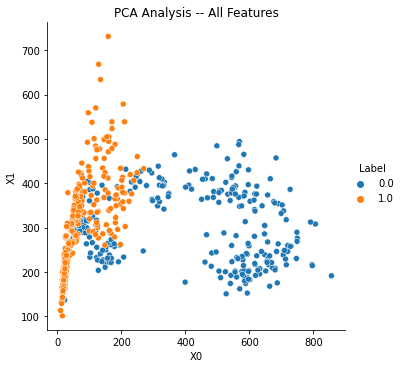

In [7]:
all_trials_tensor = torch.tensor(all_trials)

# all_trials_tensor = torch.tensor(np.array(data[["SSC_ECR", "WA_FCU", "WL_ECR", "WL_FCU","SD_ECR", "SD_FCU","Mean_ECR", "Mean_FCU", "Var_FCU"]]))


U, S, V = torch.pca_lowrank(all_trials_tensor)

print(S)

f2 = torch.matmul(all_trials_tensor, V[:, :2])

f2l = np.hstack((f2, labels))
df = pd.DataFrame(f2l)
df.columns = ["X0", "X1", "Label"]

p = sns.relplot(data=df, x="X0", y = "X1", hue="Label")
p.set(title="PCA Analysis -- All Features")

In [ ]:
all_trials_tensor = torch.tensor(np.array(data[["SSC_ECR", "WA_FCU", "WL_ECR", "WL_FCU","SD_ECR", "SD_FCU","Mean_ECR", "Mean_FCU", "Var_FCU"]]))

U, S, V = torch.pca_lowrank(all_trials_tensor)

print(S)

f2 = torch.matmul(all_trials_tensor, V[:, :2])

f2l = np.hstack((f2, labels))
df = pd.DataFrame(f2l)
df.columns = ["X0", "X1", "Label"]

p = sns.relplot(data=df, x="X0", y = "X1", hue="Label")
p.set(title="PCA Analysis -- Subset Features")